In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob, inspect, sys
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis

from lifelines.plotting import plot_lifetimes


In [2]:
data = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/Survival_df.csv'),
                  index_col=0)

In [34]:
data_GAN = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/CopulaGAN_simulated_data_survival_2.csv'),
                  index_col=None)

In [35]:
data_x = data.iloc[:, 2:]
data_y = data.iloc[:, 0:2]

In [36]:
data_GAN_x = data_GAN.iloc[:, 2:]
data_GAN_y = data_GAN.iloc[:, 0:2]

## Lifetime

### Actual

Text(0.5, 1.0, 'Failure at $cycle=1e6$')

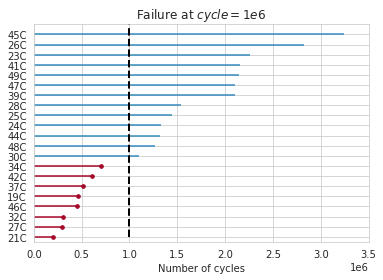

In [37]:
current_time = 1000000

observed_lifetimes = np.minimum(data['F_Time'], current_time)
death_observed = data['F_Time'] < current_time

ax = plot_lifetimes(data['F_Time'], event_observed=death_observed)

ax.set_xlim(0, 3500000)
ax.vlines(1000000, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("Number of cycles")
ax.set_title("Failure at $cycle=1e6$")

## Kaplan Meier

### Actual

In [38]:
data_y.F_Time.min()

200007.0

Text(0.5, 1.0, 'original data')

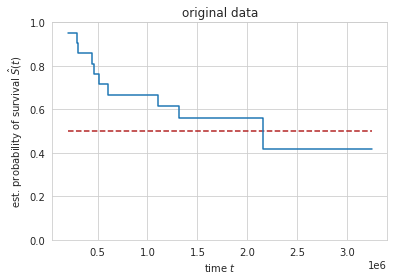

In [39]:
sns.set_style('whitegrid')
time, survival_prob = kaplan_meier_estimator(data_y["Observed"], data_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylim(0 ,1)
plt.hlines(0.5, data_y.F_Time.min(), data_y.F_Time.max(), colors='firebrick', linestyles='dashed')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('original data')

### Synthetic

In [46]:
data[data.F_Time>= 3245200]

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_51_119,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
ID,,,,,,,,,,,,,,,
45C,False,3245267.0,0,1.245687,0.80997,0.989351,1.282046,0.896534,1.137561,1.82414,3.458337,189.010633,-0.64571,-3.20222,4.186639


In [47]:
data_GAN[data_GAN.F_Time>= 3245200]

,Observed,F_Time,NDE_cycle,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio,NLE_ratio_51_17,NLE_ratio_85_17,NLE_ratio_51_119,NLO_avg,Avg_RP,ACEE_30_Avg_58,ACEE_500_Avg_58,ACPD_Avg_58
169,False,3.245202e+06,0,1.240251,0.820575,0.989221,1.377117,0.883023,1.145195,1.834532,4.801163,190.109194,-0.787202,-3.182195,4.245327
274,True,3.245261e+06,0,2.366738,1.184306,0.989186,1.271352,0.885641,1.111893,1.859908,5.185710,190.391273,-0.519786,-3.353926,4.454585
583,False,3.245251e+06,600000,0.613868,1.308975,0.995932,0.992854,0.901894,1.095704,1.833083,3.599733,172.626301,-0.913843,-1.056651,3.443269
655,False,3.245253e+06,0,1.514547,0.822348,0.985618,1.156394,0.888110,1.081237,1.840053,4.681058,188.279747,-0.552365,-3.412243,3.830807


Text(0.5, 1.0, 'synthetic data')

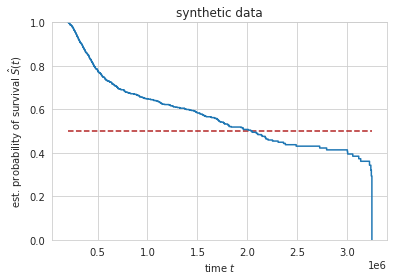

In [48]:
time, survival_prob = kaplan_meier_estimator(data_GAN_y["Observed"], data_GAN_y["F_Time"])
plt.step(time, survival_prob, where="post")
plt.ylim(0 ,1)
plt.hlines(0.5, data_GAN_y.F_Time.min(), data_GAN_y.F_Time.max(), colors='firebrick', linestyles='dashed')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title('synthetic data')

## Kaplan Meier by 'age' i.e. cycle at NDE

### Actual

In [52]:
data_x.NDE_cycle.unique()

array([     0, 300000, 450000, 600000, 750000, 900000])

Text(0.5, 1.0, 'original data')

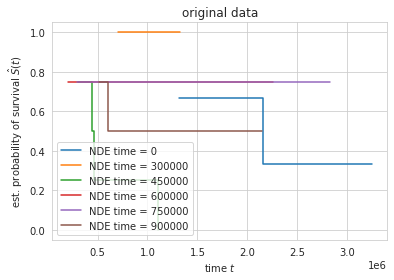

In [53]:
for age in [0, 300000, 450000, 600000, 750000, 900000]:
    mask_treat = data_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_y["Observed"][mask_treat],
        data_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.title('original data')

### Synthetic

Text(0.5, 1.0, 'synthetic data')

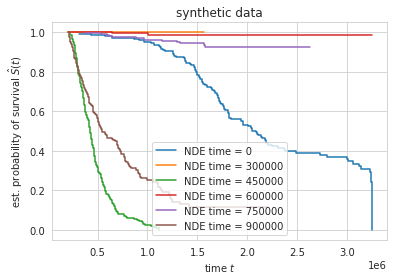

In [54]:
for age in [0, 300000, 450000, 600000, 750000, 900000]:
    mask_treat = data_GAN_x["NDE_cycle"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        data_GAN_y["Observed"][mask_treat],
        data_GAN_y["F_Time"][mask_treat])

    plt.step(time_age, survival_prob_age, where="post",
             label="NDE time = %s" % age)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")
plt.title('synthetic data')